# Linear Regression to Predict Student Performance

<div class="alert alert-block alert-info">

authors, group info, project info

</dic>

Our selected dataset is [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors).

All of the scripts and data for this project can be found on our [Git Repository](https://github.com/cztm/linear-regression).

In [94]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import seaborn as sns

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from plotnine import *
import scipy.stats as stats
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns
%config InlineBackend.figure_format = 'retina'



In [95]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'  
rcParams['font.sans-serif'] = ['Arial']

# Student Performance Factors Dataset Overview

The "Student Performance Factors" dataset contains 19 variables that may influence students' exam scores. It is designed to help researchers analyze the potential impact of these factors on student performance. The dataset includes information such as study time (`Hours_Studied`), attendance (`Attendance`), parental involvement (`Parental_Involvement`), access to resources (`Access_to_Resources`), and participation in extracurricular activities (`Extracurricular_Activities`). Additionally, it covers socioeconomic and background data such as family income (`Family_Income`), motivation level (`Motivation_Level`), tutoring sessions (`Tutoring_Sessions`), school type (`School_Type`), sleep hours (`Sleep_Hours`), and parental education level (`Parental_Education_Level`).

## Purpose and Applications

Researchers can use this dataset to build regression models for predicting exam scores (`Exam_Score`) and to identify significant factors affecting student academic performance. The dataset's potential applications include:

- Supporting educational decision-making
- Assisting in policy formulation
- Optimizing the allocation of educational resources

Ultimately, the goal is to better understand and improve the key factors influencing student success, thereby enabling educators and policymakers to provide more targeted support.

## Variable Descriptions

1. **Hours_Studied**: Daily study hours.  
2. **Attendance**: Attendance rate (percentage).  
3. **Parental_Involvement**: Parent involvement (Low, Medium, High).  
4. **Access_to_Resources**: Resource accessibility (Low, Medium, High).  
5. **Extracurricular_Activities**: Participation in extracurricular activities.  
6. **Sleep_Hours**: Daily sleep hours.  
7. **Previous_Scores**: Prior exam scores.  
8. **Motivation_Level**: Motivation level (Low, Medium, High).  
9. **Internet_Access**: Internet access.  
10. **Tutoring_Sessions**: Number of tutoring sessions.  
11. **Family_Income**: Family income level (Low, Medium, High).  
12. **Teacher_Quality**: Teacher quality (Low, Medium, High).  
13. **School_Type**: School type (Public or Private).  
14. **Peer_Influence**: Peer influence (Positive, Neutral, Negative).  
15. **Physical_Activity**: Weekly physical activity hours.  
16. **Learning_Disabilities**: Presence of learning disabilities.  
17. **Parental_Education_Level**: Parents' education level (High School, College, Postgraduate).  
18. **Distance_from_Home**: Distance from home to school (Near, Moderate, Far).  
19. **Gender**: Student gender (Male or Female).  
20. **Exam_Score**: Academic performance indicator (exam score).

## Research Questions

1. **Which factors are the most significant predictors of students' exam scores?**
2. **How do parental involvement, access to resources, and socioeconomic factors impact student performance?**
3. **What is the combined effect of study habits, peer influence, and tutoring sessions on exam outcomes?**
4. **Does school type or teacher quality significantly influence exam scores?**

## Methods Used in the Analysis
   
1. **Exploratory Data Analysis**: Initial analysis includes correlation calculations to understand the relationships between predictors and exam scores.

2. **Multiple Linear Regression**: Regression models are built using significant predictors such as attendance, hours studied, and previous scores. The model is validated using metrics like adjusted R-squared, p-values, and F-statistics.

3. **ANOVA (Types I, II, and III)**: Variance analysis is conducted to understand the contribution of each predictor to the total variance in exam scores.

4. **Model Evaluation**: The model’s prediction capability is visualized through plots of actual vs. predicted exam scores, residuals distribution, and summary statistics.


In [96]:
students = pd.read_csv("StudentPerformanceFactors.csv")

## EDA

### First sniff of the data

In [97]:
print(f"Our dataset has {students.shape[1]} variables and {students.shape[0]} records")

Our dataset has 20 variables and 6607 records


In [98]:
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [99]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Variable types

In [100]:
object_cols = []
numeric_cols = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numeric_cols.append(colname)
    elif type == "object":
        object_cols.append(colname)

In [101]:
print(f"Object columns: {object_cols}")
print(f"Numeric columns: {numeric_cols}")

Object columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [102]:
unique_values = students.nunique()
unique_values

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

Let's check that all of our object variables can be turned into categorical:

In [103]:
students[object_cols].nunique()

Parental_Involvement          3
Access_to_Resources           3
Extracurricular_Activities    2
Motivation_Level              3
Internet_Access               2
Family_Income                 3
Teacher_Quality               3
School_Type                   2
Peer_Influence                3
Learning_Disabilities         2
Parental_Education_Level      3
Distance_from_Home            3
Gender                        2
dtype: int64

Since all of them are not actually continuous or discrete values with a lot of unique values, let's go ahead and turn them info categorical variables.

In [104]:
students[object_cols] = students[object_cols].astype('category')

Let's check our resulting column types and redefine our lists.

In [105]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [106]:
categorical_variables = []
numerical_variables = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numerical_variables.append(colname)
    elif type == "category":
        categorical_variables.append(colname)

In [107]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


### Missing values
Let's take a closer look at the missing values in our dataset.

In [108]:
students.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Let's check the actual frequency of our missing values based on the total amount of records we have.

In [109]:
students.isnull().sum()/len(students)*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

The percentage of missing values we have is very very low, and since we have a considerable number of records as it is, we've decided to **drop the records with missing data**

In [110]:
students_adjusted = students.dropna()
students_adjusted.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [111]:
print(f"The original dataset, students, has {students.shape[1]} variables and {students.shape[0]} records")
print(f"We had a total of {students.shape[0]-students_adjusted.shape[0]} records with missing data.")
print(f"Our resulting dataset, adjusted_students, has {students_adjusted.shape[1]} variables and {students_adjusted.shape[0]} records")

The original dataset, students, has 20 variables and 6607 records
We had a total of 229 records with missing data.
Our resulting dataset, adjusted_students, has 20 variables and 6378 records


### First visualizations

We want to visualize our variables, and therefore will use a number of different plots. We will approach numerical and categorical variables differently.

In [112]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


#### Categorical variables

##### Confusion tables

In [113]:
parent_invol_resource_access_crossed = pd.crosstab(students['Parental_Involvement'],students['Access_to_Resources'])
print(parent_invol_resource_access_crossed)

Access_to_Resources   High  Low  Medium
Parental_Involvement                   
High                   568  413     927
Low                    414  231     692
Medium                 993  669    1700


In [114]:
peer_influence_income_crossed = pd.crosstab(students['Peer_Influence'],students['Family_Income'])
print(peer_influence_income_crossed)

Family_Income   High   Low  Medium
Peer_Influence                    
Negative         251   577     549
Neutral          493  1038    1061
Positive         525  1057    1056


In [115]:
distance_motivation_crossed = pd.crosstab(students['Distance_from_Home'], students['Motivation_Level'])
print(distance_motivation_crossed)

Motivation_Level    High   Low  Medium
Distance_from_Home                    
Far                  142   185     331
Moderate             394   611     993
Near                 773  1125    1986


In [116]:
students = students.drop(columns=['Distance_from_Home', 'Peer_Influence', 'Parental_Involvement'])

In [117]:
students.sample(5)

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Gender,Exam_Score
3902,30,100,High,No,7,53,Medium,Yes,2,Low,High,Private,3,No,High School,Male,72
5507,5,65,High,No,7,71,Medium,Yes,0,Low,Medium,Private,2,No,College,Male,56
5113,12,62,High,Yes,7,63,High,Yes,1,High,Medium,Public,4,No,High School,Female,62
3071,30,63,High,Yes,8,96,Medium,Yes,4,Low,Medium,Private,3,No,Postgraduate,Female,71
1811,21,67,High,No,7,52,Medium,Yes,3,Low,Medium,Public,3,Yes,High School,Female,62


Since students who have medium/high parental involvement also have medium/high access to resources, both categories aren't necessary for the model and since access to resources matters more for our model, we have dropped parental involvement. Similarly, medium/high family income students have neutral/positive peer relationships and those with medium/high motivation levels live moderate/near school. Since there are associations between those two groups, we've chosen to kep family income and motivation levels as they variables that we're interested in. 

# Lasso Model Selection

In [118]:
X = students.drop('Exam_Score', axis= 1)
y = students['Exam_Score']

In [119]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [120]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' avoids dummy variable trap
    ]
)


In [121]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.2))  # You can adjust alpha for regularization
])

# Fit the model to the entire dataset
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Learning_Disabilities', 'Parental_Education_Level', 'Gender'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.2))])

In [122]:
# Get feature names after one-hot encoding
encoded_categorical_names = lasso_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical column names
all_feature_names = list(numerical_cols) + list(encoded_categorical_names)

# Get the coefficients of the Lasso model
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Select features with non-zero coefficients
selected_features = [name for name, coef in zip(all_feature_names, lasso_coefficients) if coef != 0]

print(f'Selected predictors: {selected_features}')

Selected predictors: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Access_to_Resources_Low']


In [123]:
lasso_model = smf.ols('Exam_Score ~ Attendance + Previous_Scores + Tutoring_Sessions + Access_to_Resources', data = students).fit()
lasso_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     977.6
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:06:26   Log-Likelihood:                -16519.
No. Observations:                6607   AIC:                         3.305e+04
Df Residuals:                    6601   BIC:                         3.309e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        47.8905      0.328    146.217      0.000      47.248      48.533
Access_to_Resources[T.Low]       -1.9357      0.105    -18.419      0.000      -2.142      -1.730
Access_to_Resources[T.Medium]    -0.9763      0.084    -11.644      0.000      -1.141      -0.812
Attendance                        0.1970      0.003     62.639      0.000       0.191       0.203
Previous_Scores                   0.0499      0.003     19.790      0.000       0.045       0.055
Tutoring_Sessions                 0.4825      0.030     16.356      0.000       0.425       0.540
==============================================================================
Omnibus:                     5481.631   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266364.090
Skew:                           3.664   Prob(JB):                         0.00
Kurtosis:                      33.230   Cond. No.                         999.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Full Model Test


In [124]:
X_full = students.drop('Exam_Score', axis= 1)
y = students['Exam_Score']
formula = 'Exam_Score ~ ' + ' + '.join(X_full.columns)

full_model = smf.ols(formula=formula, data=students).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     634.8
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:06:26   Log-Likelihood:                -14304.
No. Observations:                6443   AIC:                         2.865e+04
Df Residuals:                    6421   BIC:                         2.880e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   42.3571      0.347    122.018      0.000      41.677      43.038
Access_to_Resources[T.Low]                  -2.0018      0.081    -24.863      0.000      -2.160      -1.844
Access_to_Resources[T.Medium]               -0.9916      0.064    -15.394      0.000      -1.118      -0.865
Extracurricular_Activities[T.Yes]            0.5282      0.057      9.309      0.000       0.417       0.639
Motivation_Level[T.Low]                     -1.0170      0.081    -12.576      0.000      -1.175      -0.858
Motivation_Level[T.Medium]                  -0.5103      0.074     -6.941      0.000      -0.654      -0.366
Internet_Access[T.Yes]                       0.9460      0.105      8.997      0.000       0.740       1.152
Family_Income[T.Low]                        -1.1249      0.077    -14.595      0.000      -1.276      -0.974
Family_Income[T.Medium]                     -0.5959      0.077     -7.725      0.000      -0.747      -0.445
Teacher_Quality[T.Low]                      -1.0759      0.101    -10.610      0.000      -1.275      -0.877
Teacher_Quality[T.Medium]                   -0.5498      0.062     -8.819      0.000      -0.672      -0.428
School_Type[T.Public]                        0.0126      0.060      0.208      0.835      -0.106       0.131
Learning_Disabilities[T.Yes]                -0.8493      0.091     -9.348      0.000      -1.027      -0.671
Parental_Education_Level[T.High School]     -0.4637      0.064     -7.232      0.000      -0.589      -0.338
Parental_Education_Level[T.Postgraduate]     0.5068      0.080      6.329      0.000       0.350       0.664
Gender[T.Male]                              -0.0605      0.056     -1.073      0.283      -0.171       0.050
Hours_Studied                                0.2926      0.005     62.880      0.000       0.283       0.302
Attendance                                   0.1985      0.002     82.303      0.000       0.194       0.203
Sleep_Hours                                 -0.0092      0.019     -0.484      0.628      -0.046       0.028
Previous_Scores                              0.0476      0.002     24.594      0.000       0.044       0.051
Tutoring_Sessions                            0.4988      0.023     22.110      0.000       0.455       0.543
Physical_Activity                            0.1847      0.027      6.817      0.000       0.132       0.238
==============================================================================
Omnibus:                     9413.834   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2740869.628
Skew:                           8.979   Prob(JB):                         0.00
Kurtosis:                     102.434   Co

In [125]:
sm.stats.anova_lm(full_model, typ=2)

,sum_sq,df,F,PR(>F)
Access_to_Resources,3136.676078,2.0,314.827198,3.696542e-131
Extracurricular_Activities,431.681988,1.0,86.655572,1.737349e-20
Motivation_Level,801.714086,2.0,80.467792,3.048247e-35
Internet_Access,403.242998,1.0,80.946747,3.005013e-19
Family_Income,1103.816681,2.0,110.789735,4.968293e-48
Teacher_Quality,680.179388,2.0,68.269393,4.590027e-30
School_Type,0.216190,1.0,0.043398,8.349846e-01
Learning_Disabilities,435.326715,1.0,87.387213,1.206080e-20
Parental_Education_Level,909.083201,2.0,91.244397,8.428029e-40
Gender,5.739535,1.0,1.152151,2.831397e-01


Removed School_Type, Gender, and Sleep_hours becuase of their low P values and F-stats. 

# Reduced Model (Best $R^2_{adj}$)

In [126]:
X_red1 = students.drop(['Exam_Score', 'School_Type', 'Gender', 'Sleep_Hours'], axis= 1)
y = students['Exam_Score']
formula = 'Exam_Score ~ ' + ' + '.join(X_red1.columns)

reduced_model1 = smf.ols(formula=formula, data=students).fit()
reduced_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     740.7
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:06:26   Log-Likelihood:                -14305.
No. Observations:                6443   AIC:                         2.865e+04
Df Residuals:                    6424   BIC:                         2.878e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   42.2667      0.314    134.600      0.000      41.651      42.882
Access_to_Resources[T.Low]                  -2.0017      0.080    -24.875      0.000      -2.159      -1.844
Access_to_Resources[T.Medium]               -0.9914      0.064    -15.404      0.000      -1.118      -0.865
Extracurricular_Activities[T.Yes]            0.5278      0.057      9.303      0.000       0.417       0.639
Motivation_Level[T.Low]                     -1.0159      0.081    -12.567      0.000      -1.174      -0.857
Motivation_Level[T.Medium]                  -0.5102      0.074     -6.940      0.000      -0.654      -0.366
Internet_Access[T.Yes]                       0.9441      0.105      8.982      0.000       0.738       1.150
Family_Income[T.Low]                        -1.1258      0.077    -14.612      0.000      -1.277      -0.975
Family_Income[T.Medium]                     -0.5966      0.077     -7.736      0.000      -0.748      -0.445
Teacher_Quality[T.Low]                      -1.0758      0.101    -10.612      0.000      -1.275      -0.877
Teacher_Quality[T.Medium]                   -0.5496      0.062     -8.817      0.000      -0.672      -0.427
Learning_Disabilities[T.Yes]                -0.8480      0.091     -9.338      0.000      -1.026      -0.670
Parental_Education_Level[T.High School]     -0.4641      0.064     -7.239      0.000      -0.590      -0.338
Parental_Education_Level[T.Postgraduate]     0.5061      0.080      6.323      0.000       0.349       0.663
Hours_Studied                                0.2926      0.005     62.896      0.000       0.283       0.302
Attendance                                   0.1985      0.002     82.344      0.000       0.194       0.203
Previous_Scores                              0.0476      0.002     24.621      0.000       0.044       0.051
Tutoring_Sessions                            0.4991      0.023     22.128      0.000       0.455       0.543
Physical_Activity                            0.1845      0.027      6.811      0.000       0.131       0.238
==============================================================================
Omnibus:                     9416.590   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2745486.348
Skew:                           8.983   Prob(JB):                         0.00
Kurtosis:                     102.519   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or oth

The $R^2_{adj}$ stayed the same when removing the non significant predictors.

# Further Reduced Model

In [127]:
model1_anova = sm.stats.anova_lm(reduced_model1, typ=2)
model1_anova

,sum_sq,df,F,PR(>F)
Access_to_Resources,3139.194464,2.0,315.157154,2.719775e-131
Extracurricular_Activities,431.043314,1.0,86.548562,1.832374e-20
Motivation_Level,800.262624,2.0,80.341786,3.445399e-35
Internet_Access,401.793723,1.0,80.675579,3.440714e-19
Family_Income,1105.924600,2.0,111.028499,3.940977e-48
Teacher_Quality,680.103846,2.0,68.278533,4.547630e-30
Learning_Disabilities,434.279195,1.0,87.198290,1.325083e-20
Parental_Education_Level,909.138974,2.0,91.272349,8.197261e-40
Hours_Studied,19701.769563,1.0,3955.889766,0.000000e+00
Attendance,33769.766983,1.0,6780.582586,0.000000e+00


In [128]:
X_red2 = students.drop(['Exam_Score', 'School_Type', 'Gender', 'Sleep_Hours', 'Previous_Scores', "Access_to_Resources"], axis= 1)
y = students['Exam_Score']
formula = 'Exam_Score ~ ' + ' + '.join(X_red2.columns)

reduced_model1 = smf.ols(formula=formula, data=students).fit()
reduced_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     672.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:06:26   Log-Likelihood:                -14885.
No. Observations:                6443   AIC:                         2.980e+04
Df Residuals:                    6427   BIC:                         2.991e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   45.1245      0.301    150.108      0.000      44.535      45.714
Extracurricular_Activities[T.Yes]            0.5198      0.062      8.376      0.000       0.398       0.641
Motivation_Level[T.Low]                     -1.0404      0.088    -11.765      0.000      -1.214      -0.867
Motivation_Level[T.Medium]                  -0.5260      0.080     -6.543      0.000      -0.684      -0.368
Internet_Access[T.Yes]                       0.9132      0.115      7.942      0.000       0.688       1.139
Family_Income[T.Low]                        -1.0946      0.084    -12.989      0.000      -1.260      -0.929
Family_Income[T.Medium]                     -0.5891      0.084     -6.984      0.000      -0.755      -0.424
Teacher_Quality[T.Low]                      -1.0112      0.111     -9.119      0.000      -1.229      -0.794
Teacher_Quality[T.Medium]                   -0.5607      0.068     -8.225      0.000      -0.694      -0.427
Learning_Disabilities[T.Yes]                -0.8439      0.099     -8.494      0.000      -1.039      -0.649
Parental_Education_Level[T.High School]     -0.4269      0.070     -6.090      0.000      -0.564      -0.290
Parental_Education_Level[T.Postgraduate]     0.5245      0.088      5.990      0.000       0.353       0.696
Hours_Studied                                0.2947      0.005     57.931      0.000       0.285       0.305
Attendance                                   0.1967      0.003     74.600      0.000       0.192       0.202
Tutoring_Sessions                            0.4831      0.025     19.585      0.000       0.435       0.531
Physical_Activity                            0.1696      0.030      5.729      0.000       0.112       0.228
==============================================================================
Omnibus:                     8177.568   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1446037.473
Skew:                           6.990   Prob(JB):                         0.00
Kurtosis:                      75.049   Cond. No.                         839.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Attempted to see if removing more predictors would make a better model but the $R^2_{adj}$ went down. Since we have ~ 6600 rows we can keep all the predictors. The guideline is about 10 observations per predictor.

# Correlation Matrix Heatmap for Reduced Model 1

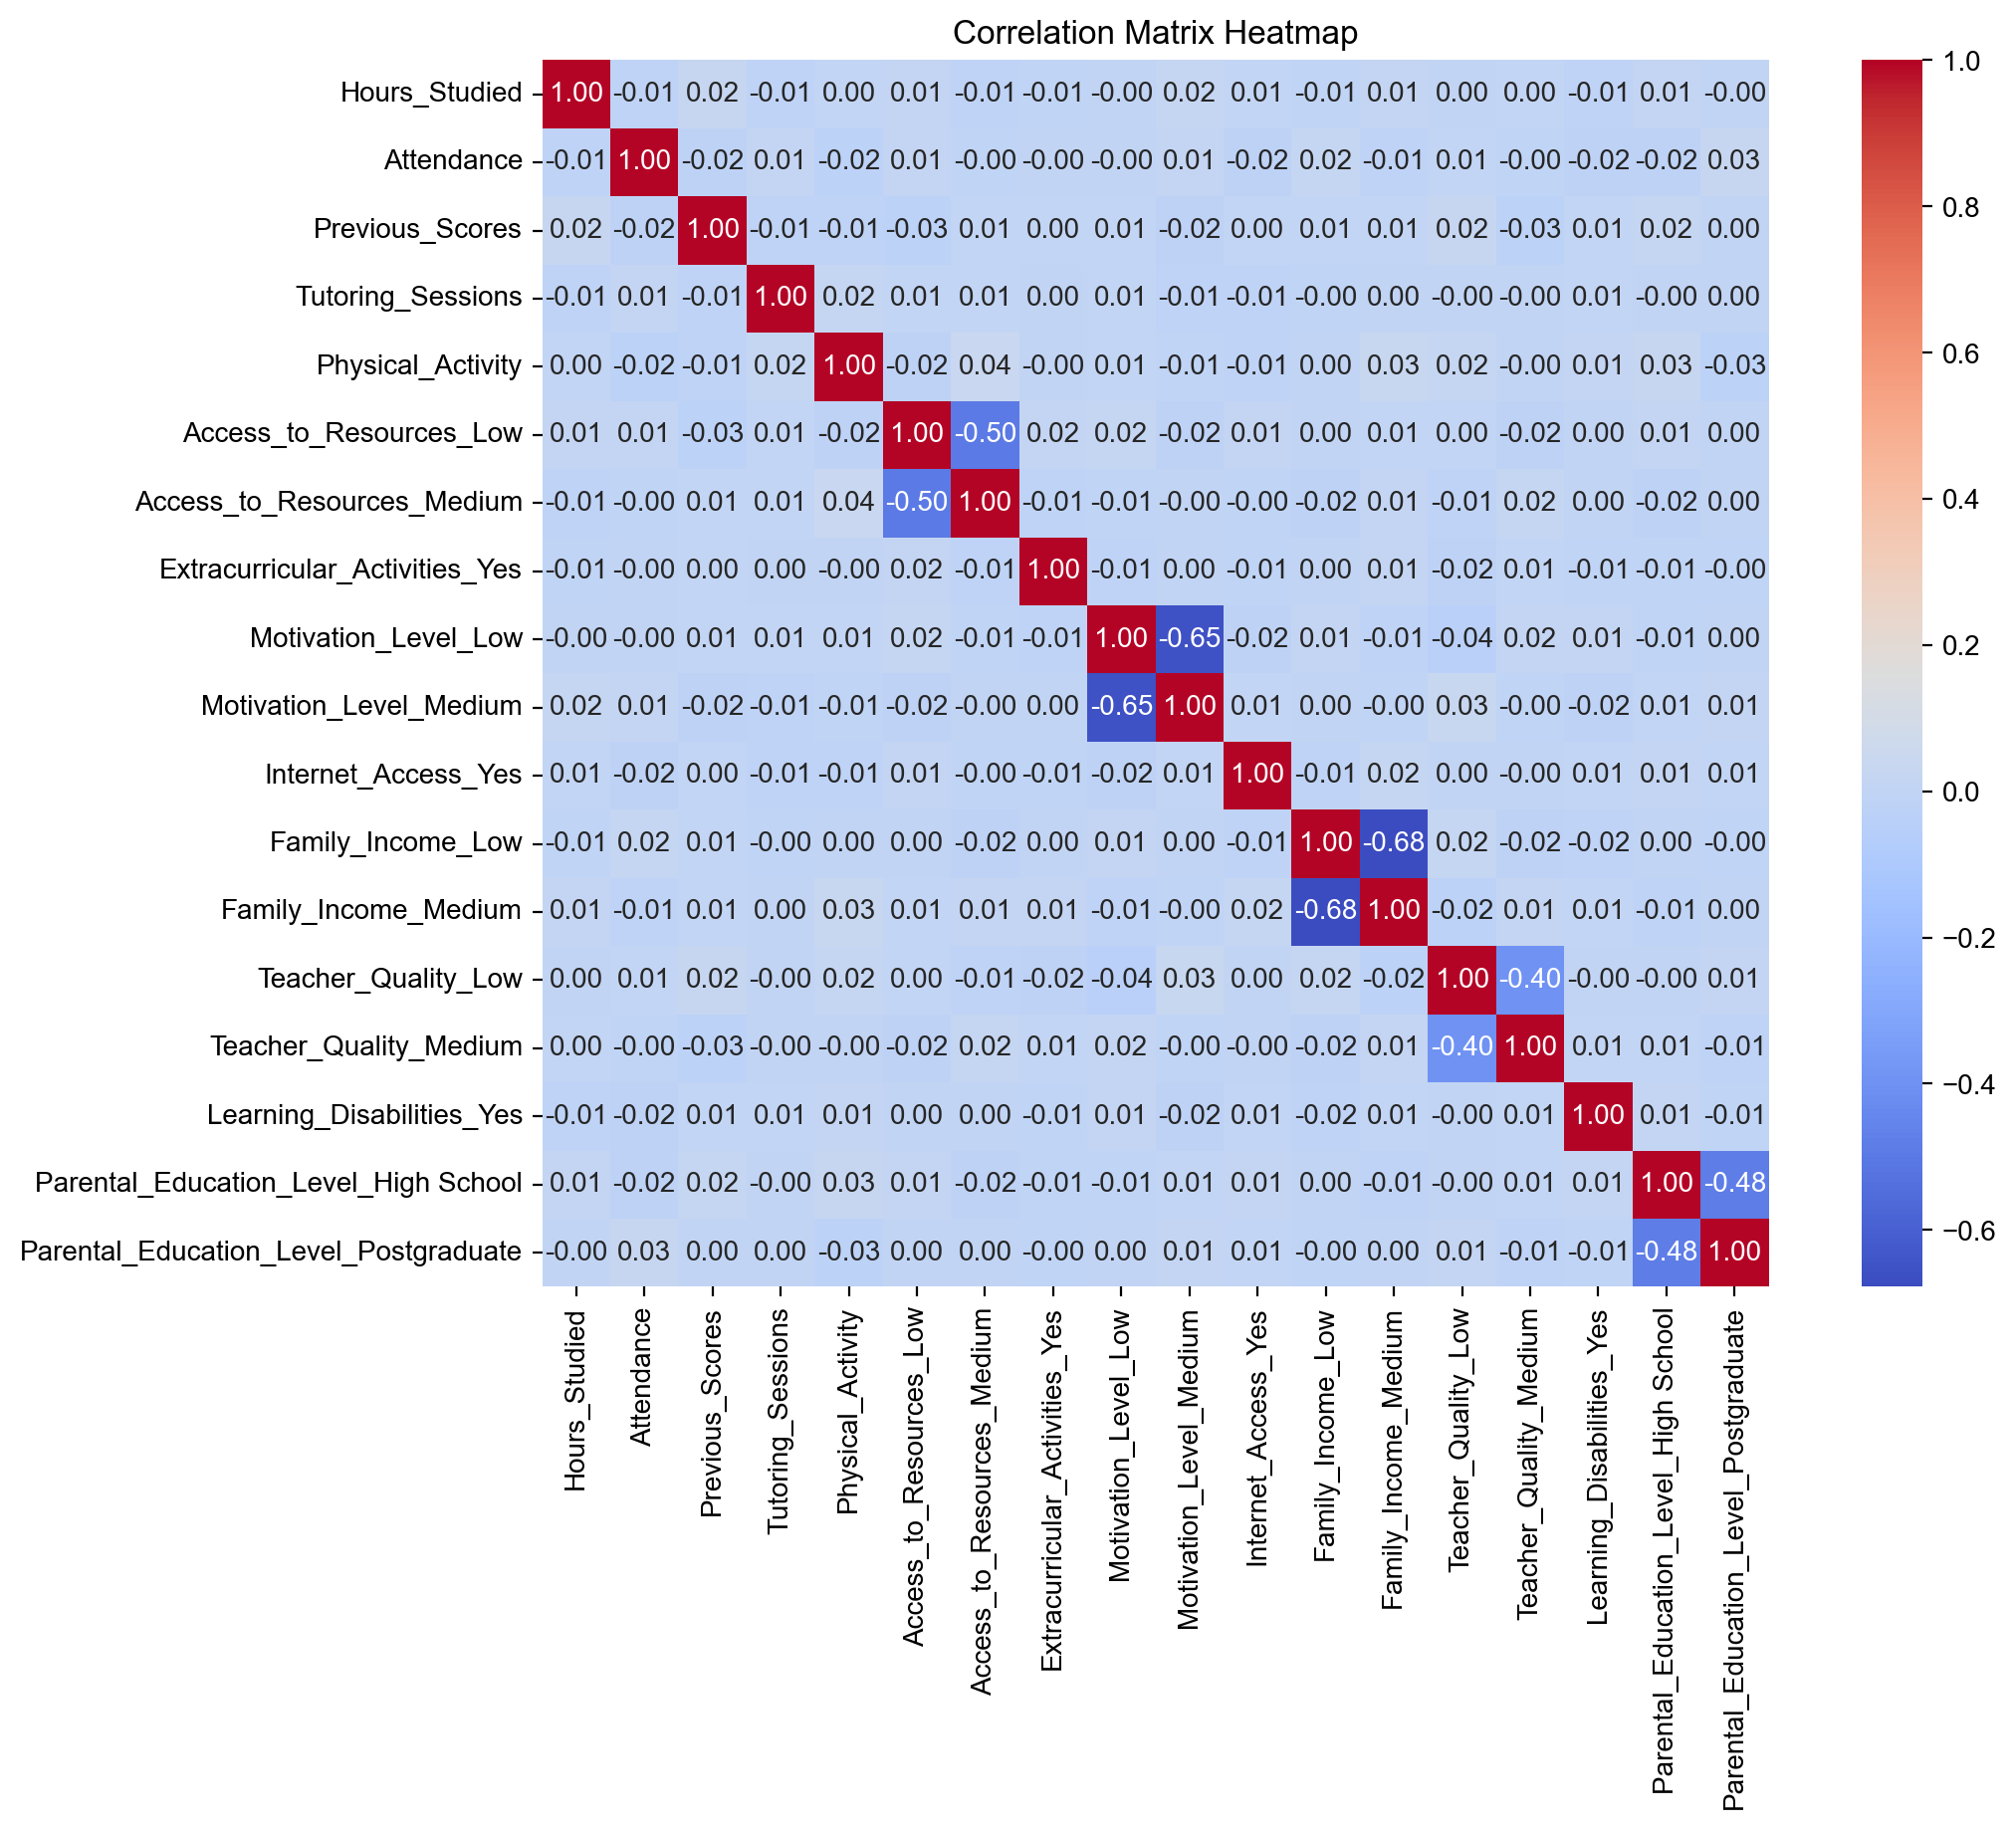

In [129]:
X_red1 = students.drop(['Exam_Score', 'School_Type', 'Gender', 'Sleep_Hours'], axis=1)

non_numeric_cols = X_red1.select_dtypes(exclude='number').columns

X_encoded = pd.get_dummies(X_red1, drop_first=True)

correlation_matrix = X_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


There is some multicolinearity but it is between levels of the same categorical group which is ok. We expect there to be some correlation there. 

# Checking Model Assumptions for Reduced Model 1

## Residual Plot

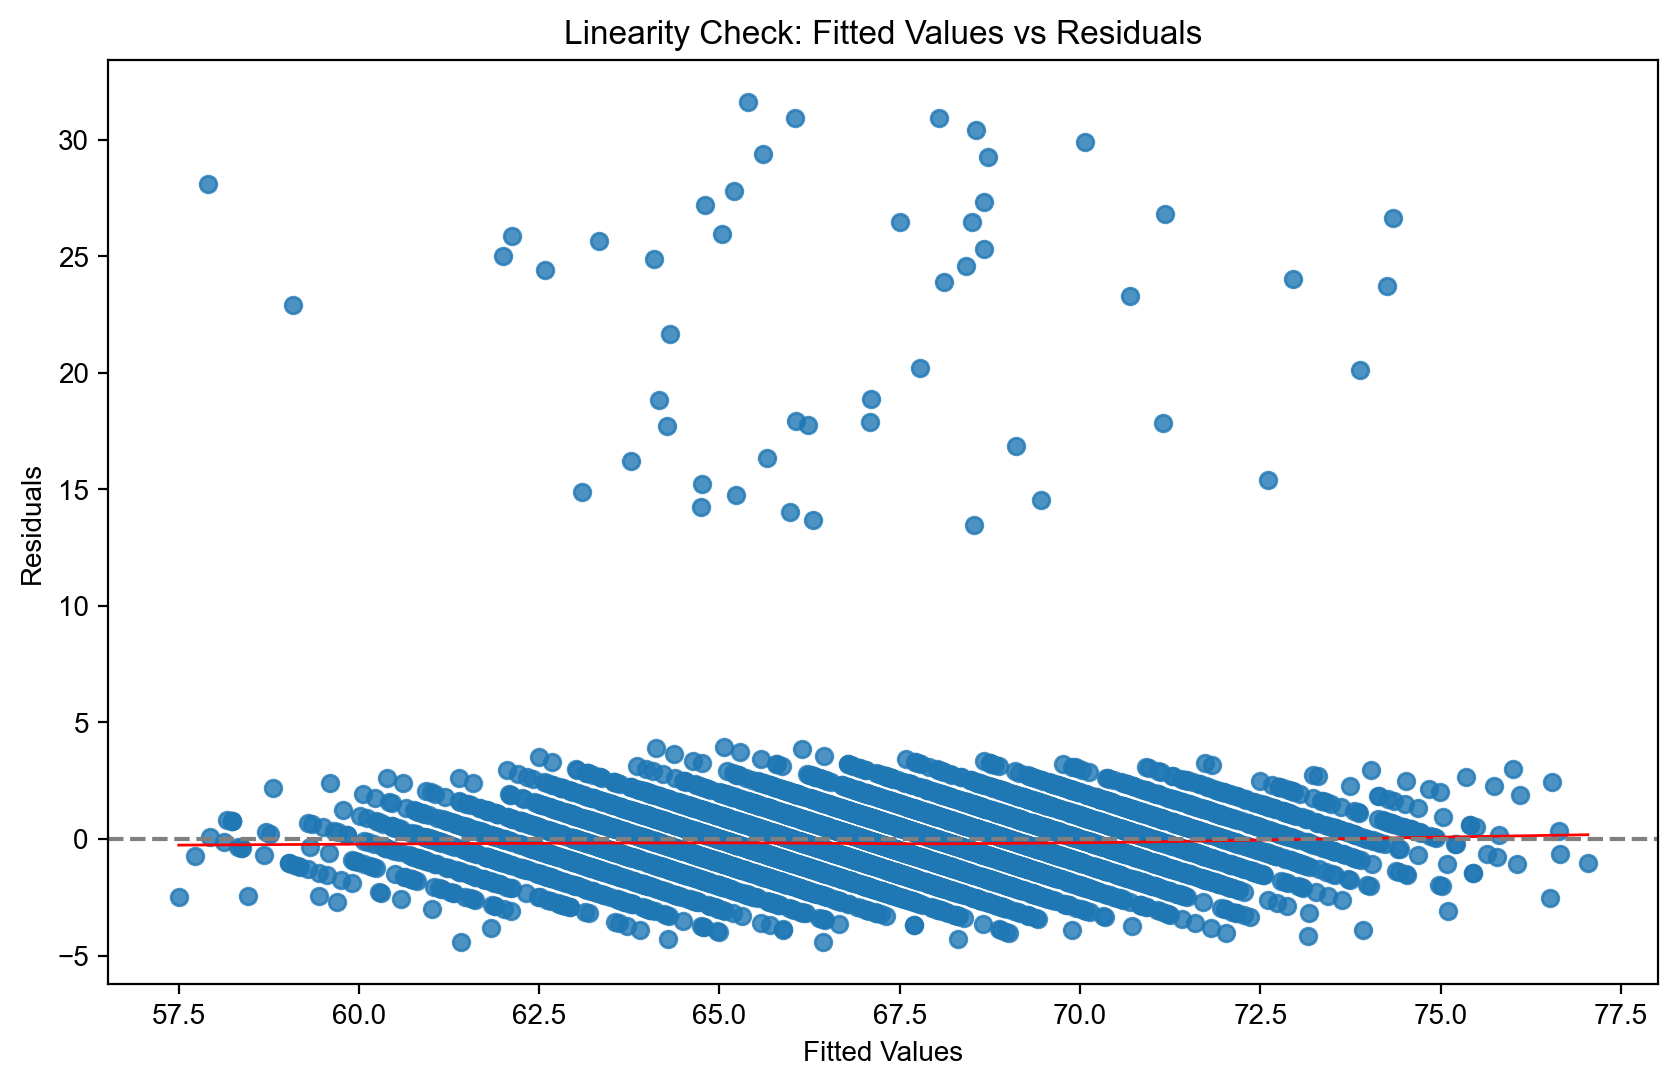

In [130]:
# a) Linearity
plt.figure(figsize=(10, 6))
sns.regplot(x=reduced_model1.fittedvalues, y=reduced_model1.resid, lowess=True, line_kws={"color": "red", "lw": 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Fitted Values vs Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

## Normal QQ-Plot

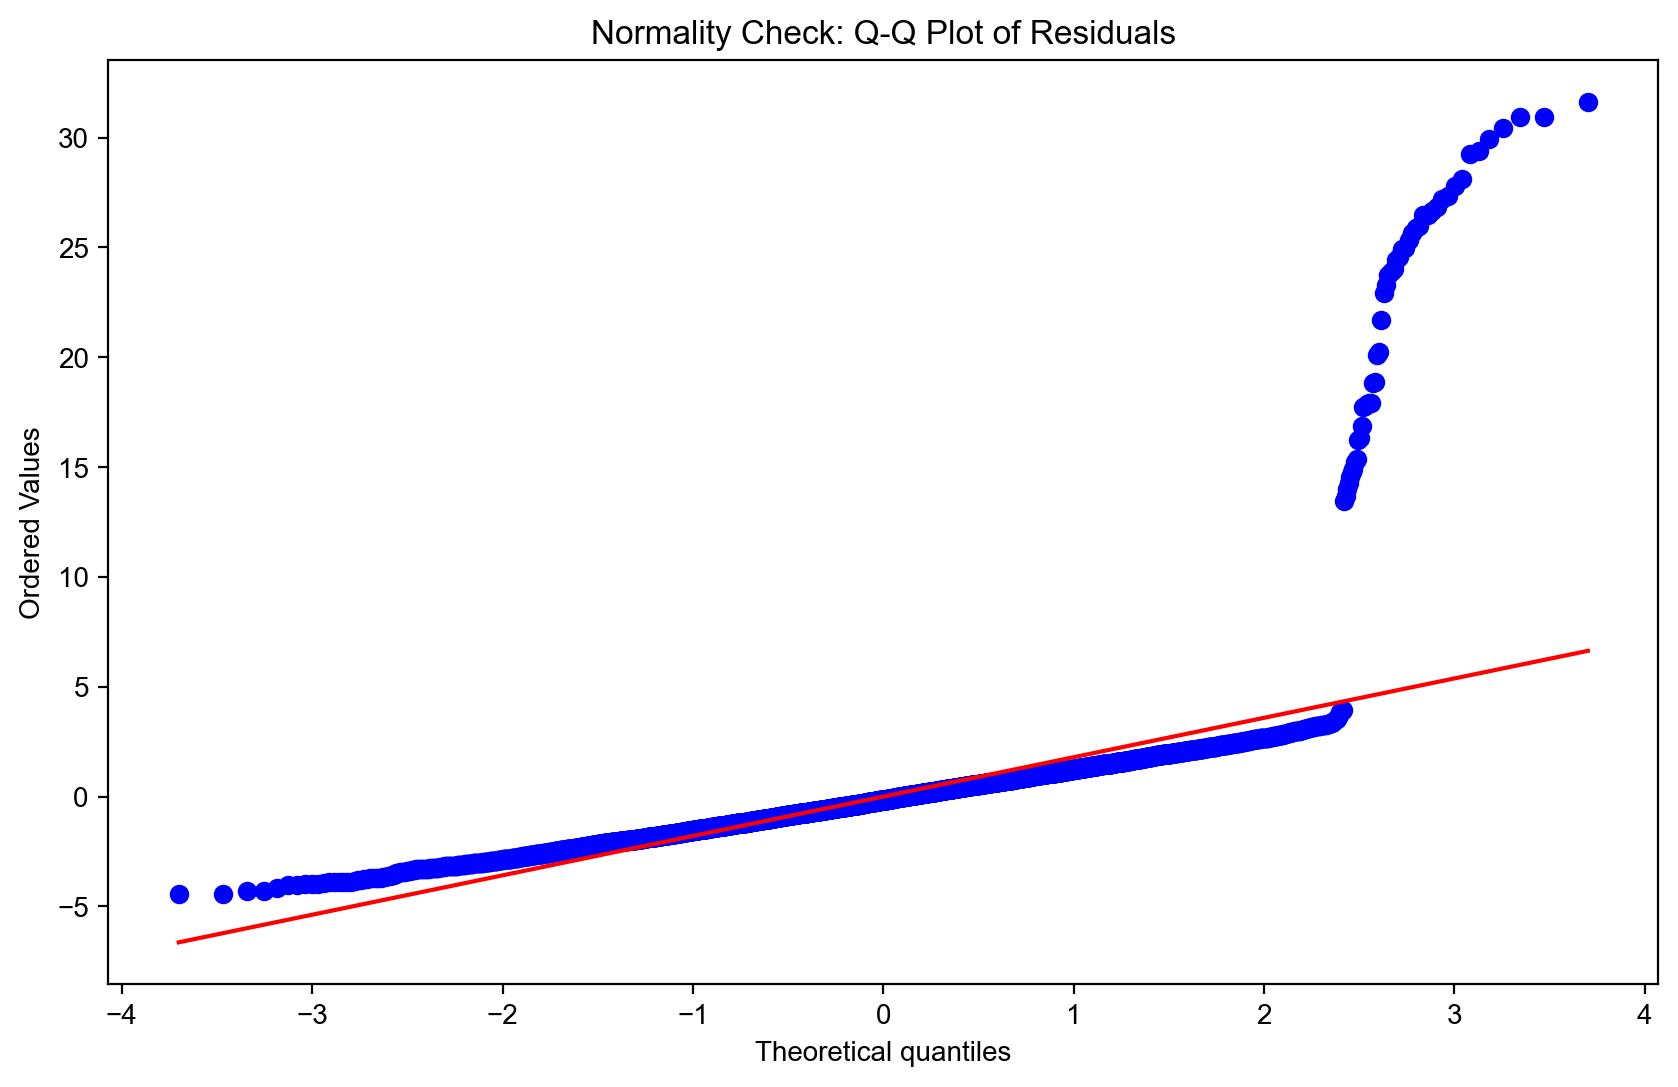

In [131]:
# b) Normality of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(reduced_model1.resid, dist="norm", plot=plt)
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()

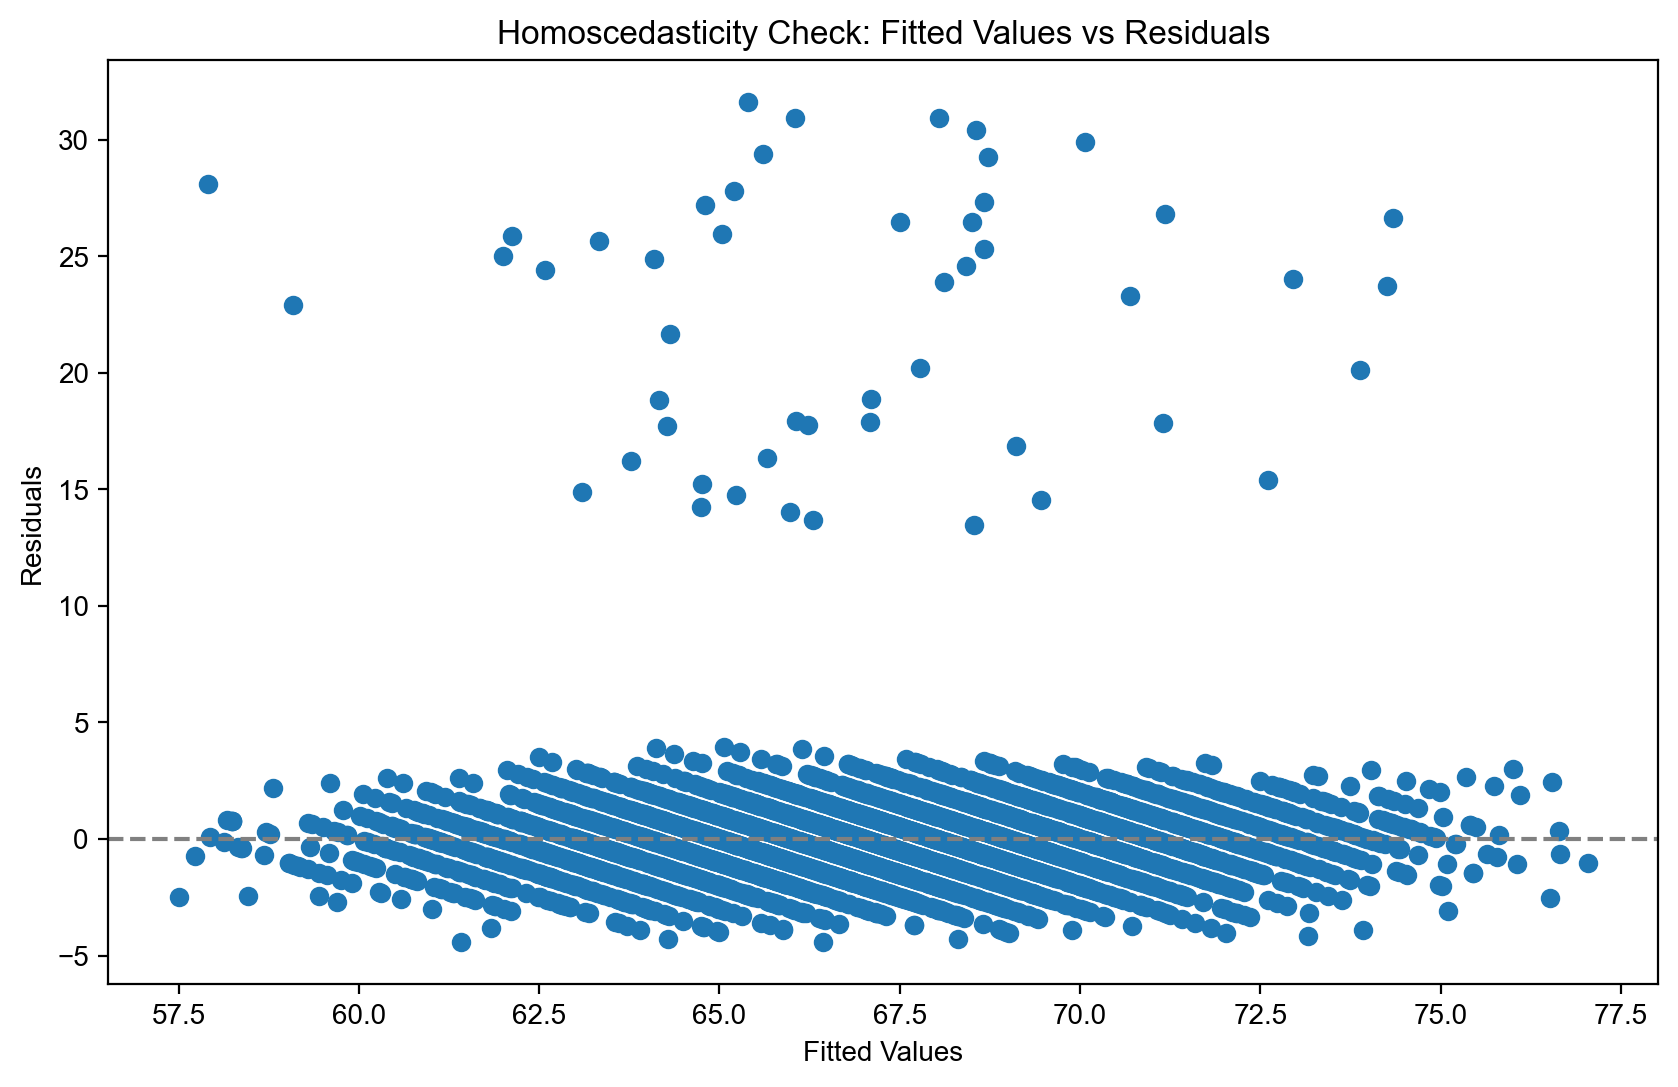

In [132]:
# c) Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(reduced_model1.fittedvalues, reduced_model1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Fitted Values vs Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

# Looking at filtering out Dataset to remove outliers

In [136]:
students['Exam_Score'].value_counts().sort_values()

Exam_Score
56       1
96       1
85       1
91       1
55       1
83       1
101      1
100      1
93       2
92       2
99       2
87       2
95       2
98       3
79       3
89       3
97       3
84       3
88       3
94       4
78       4
86       4
82       4
57       4
77       5
80       5
76      16
58      22
59      40
75      48
60      77
74     106
73     141
61     171
62     264
72     304
63     371
71     408
64     501
70     542
69     624
65     679
67     717
66     751
68     759
Name: count, dtype: int64

In [137]:
temp_student = students[students['Exam_Score'].between(60, 100)] 

In [138]:
temp_student['Exam_Score'].value_counts().sort_values()

Exam_Score
85       1
83       1
100      1
96       1
91       1
93       2
95       2
87       2
99       2
92       2
97       3
84       3
89       3
88       3
98       3
79       3
86       4
94       4
82       4
78       4
80       5
77       5
76      16
75      48
60      77
74     106
73     141
61     171
62     264
72     304
63     371
71     408
64     501
70     542
69     624
65     679
67     717
66     751
68     759
Name: count, dtype: int64

In [140]:
temp_X_red1 = temp_student.drop(['Exam_Score', 'School_Type', 'Gender', 'Sleep_Hours'], axis= 1)
y = temp_student['Exam_Score']
formula = 'Exam_Score ~ ' + ' + '.join(temp_X_red1.columns)

temp_model1 = smf.ols(formula=formula, data=temp_student).fit()
temp_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.173e+05
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:09:45   Log-Likelihood:                 1131.9
No. Observations:                6375   AIC:                            -2224.
Df Residuals:                    6355   BIC:                            -2089.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -246.7958      0.335   -736.691      0.000    -247.453    -246.139
Access_to_Resources[T.Low]                   0.2202      0.008     28.223      0.000       0.205       0.236
Access_to_Resources[T.Medium]                0.1103      0.006     18.333      0.000       0.098       0.122
Extracurricular_Activities[T.Yes]           -0.0569      0.005    -10.876      0.000      -0.067      -0.047
Motivation_Level[T.Low]                      0.1200      0.008     15.976      0.000       0.105       0.135
Motivation_Level[T.Medium]                   0.0572      0.007      8.494      0.000       0.044       0.070
Internet_Access[T.Yes]                      -0.1200      0.010    -12.305      0.000      -0.139      -0.101
Family_Income[T.Low]                         0.1163      0.007     16.220      0.000       0.102       0.130
Family_Income[T.Medium]                      0.0536      0.007      7.574      0.000       0.040       0.067
Teacher_Quality[T.Low]                       0.1195      0.009     12.723      0.000       0.101       0.138
Teacher_Quality[T.Medium]                    0.0565      0.006      9.861      0.000       0.045       0.068
Learning_Disabilities[T.Yes]                 0.1148      0.008     13.596      0.000       0.098       0.131
Parental_Education_Level[T.High School]      0.0619      0.006     10.494      0.000       0.050       0.073
Parental_Education_Level[T.Postgraduate]    -0.0646      0.007     -8.818      0.000      -0.079      -0.050
Hours_Studied                               -0.0345      0.001    -60.571      0.000      -0.036      -0.033
Attendance                                  -0.0238      0.000    -70.623      0.000      -0.025      -0.023
Previous_Scores                             -0.0054      0.000    -28.697      0.000      -0.006      -0.005
Tutoring_Sessions                           -0.0585      0.002    -27.144      0.000      -0.063      -0.054
Physical_Activity                           -0.0267      0.002    -10.736      0.000      -0.032      -0.022
Exam_Score_log                              75.3640      0.087    866.773      0.000      75.194      75.534
==============================================================================
Omnibus:                     6223.521   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           757754.025
Skew:                           4.416   Prob(JB):                         0.00
Kurtosis:                      55.676   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2

When you remove the outliers you get a much better $R^2_adj$. I filtered the exam scores 60-100 so A-D so maybe we can use that as part of our hypothesis and just work with a subset of the data?

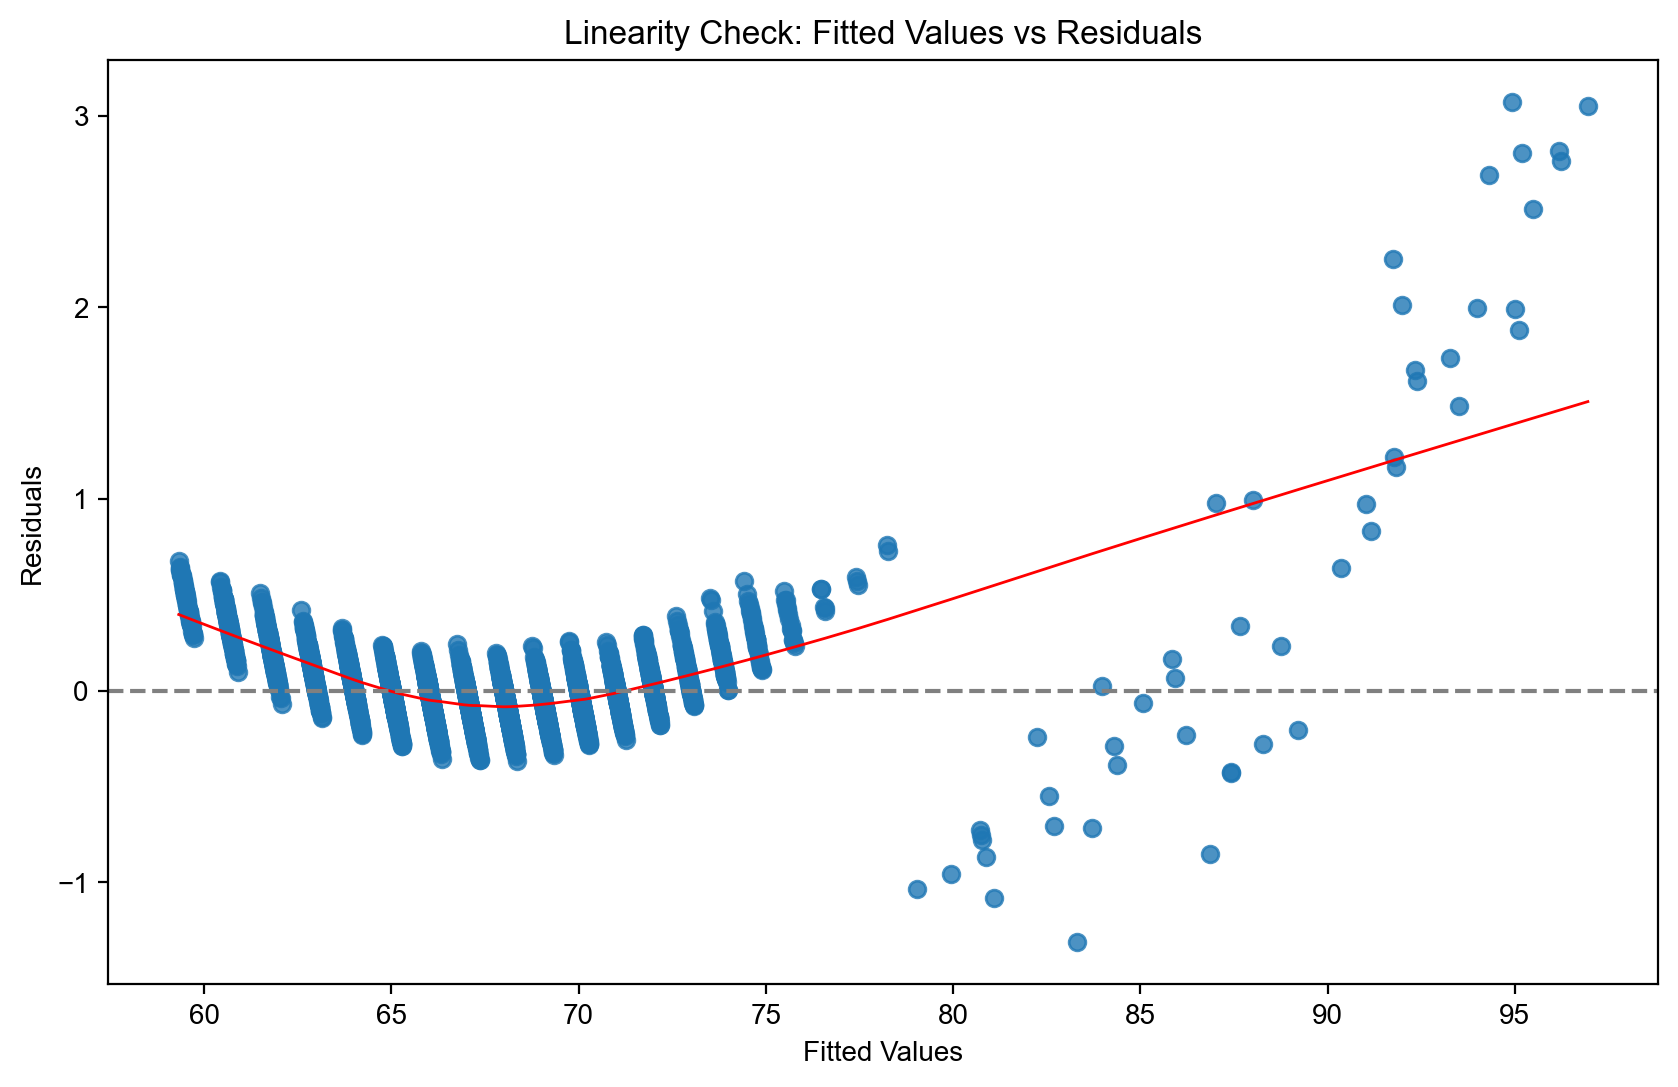

In [141]:
# a) Linearity
plt.figure(figsize=(10, 6))
sns.regplot(x=temp_model1.fittedvalues, y=temp_model1.resid, lowess=True, line_kws={"color": "red", "lw": 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Fitted Values vs Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

Makes the residuals look worse. Most likely need a transformation.

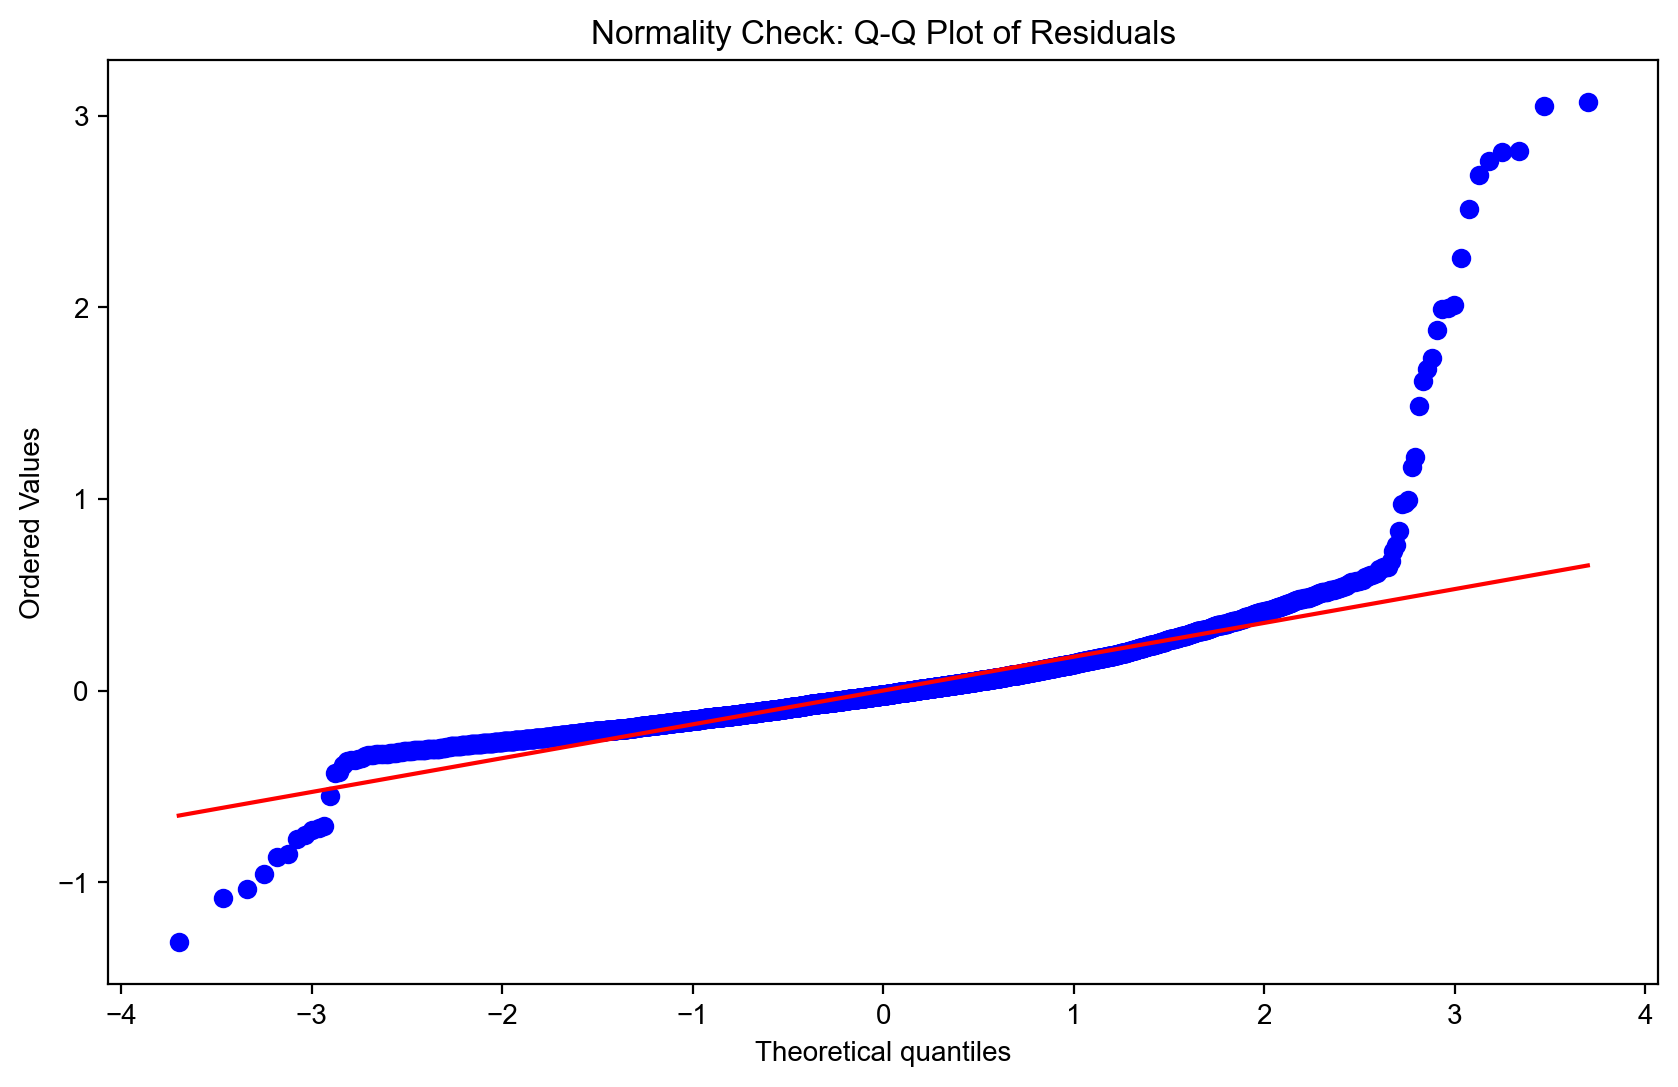

In [142]:
# b) Normality of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(temp_model1.resid, dist="norm", plot=plt)
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()

The QQ plot looks more off too